In [1]:
import os
os.chdir("/Users/ieo5776/Desktop/signal_processing_course/")
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal
from tools import denoise
import copy

# Convolution and Frequency-domain Multiplication (Spectral multiplication)
Refer back to the mean-smoothing exercise in the denoising chapter. The goal is to reproduce the smoothing obtained with the running mean filter but with frequency-domain multiplication.  
The idea is to take the FT of both the signal and a kernel, multiply them and then use the IFT to go back to time domain

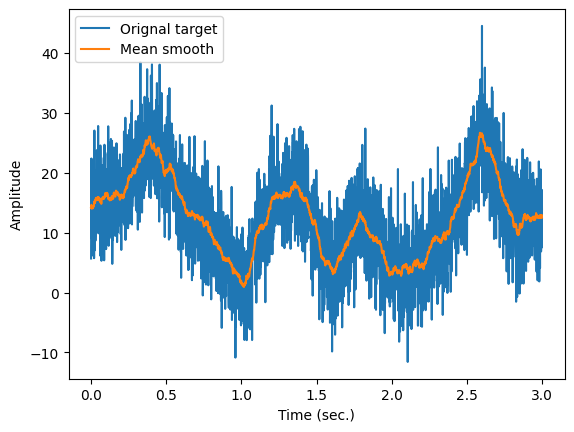

In [2]:
# Create the target signal based on mean-smoothing exercise
# create signal
srate = 1000 # Hz sampling rate
time  = np.arange(0,3,1/srate) # this means time is 3 seconds
n     = len(time)
p     = 15 # poles for random interpolation

# noise level, measured in standard deviations
noiseamp = 5

# amplitude modulator and noise level
ampl   = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30) 
noise  = noiseamp * np.random.randn(n)
signal = ampl + noise

# Compute mean smoothing
filtsig = denoise.mean_smoothing(k=20, time=n, signal=signal)

# plot the noisy and filtered signals
plt.plot(time,signal,label='Orignal target')
plt.plot(time,filtsig,label='Mean smooth')

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
#plt.title('Running-mean filter with a k=%d-ms filter' %windowsize)

plt.show()

# Solution

It was actually pretty straightforward. I've just computed the fourier spectrum of the signal and a convolution kernel (a gaussian seems to be working nicely) and then computed the spectral multiplication. Then IFT to plot it over them mean smoothing filter in the time domain

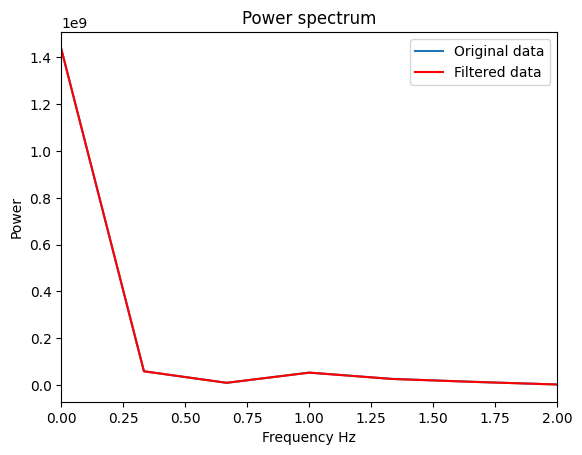

In [3]:
# First of all let's take the power spectrum of the original and filtered signal to figure out what kind of smoothing has been done
# Same in freq spectrum
hz = np.linspace(0,srate/2,int(np.floor(len(filtsig)/2)+1))
pwr_original = np.abs(scipy.fftpack.fft(signal))**2
pwr_filt = np.abs(scipy.fftpack.fft(filtsig))**2


#%matplotlib widget
plt.plot(hz, pwr_original[0:len(hz)], label="Original data")
plt.plot(hz, pwr_filt[:len(hz)], 'r', label="Filtered data")
plt.legend()
plt.xlabel('Frequency Hz')
plt.ylabel('Power')
plt.title('Power spectrum')
plt.xlim(0, 2)
plt.show()

Although they look identical it's not really the case if you really zoom in

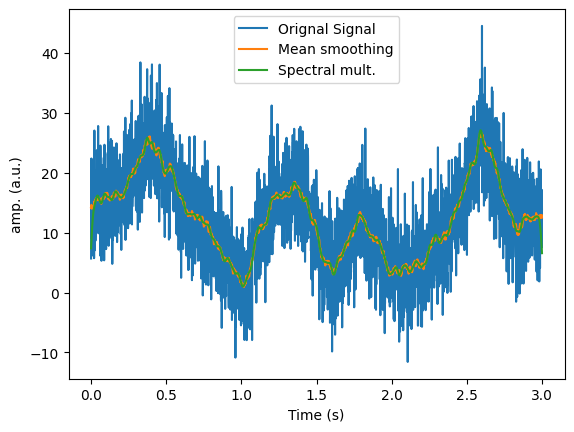

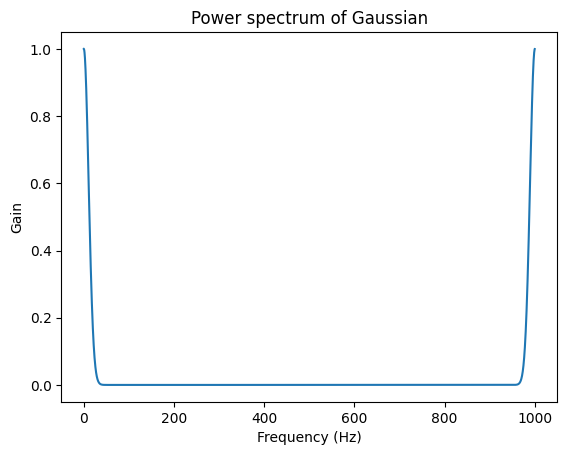

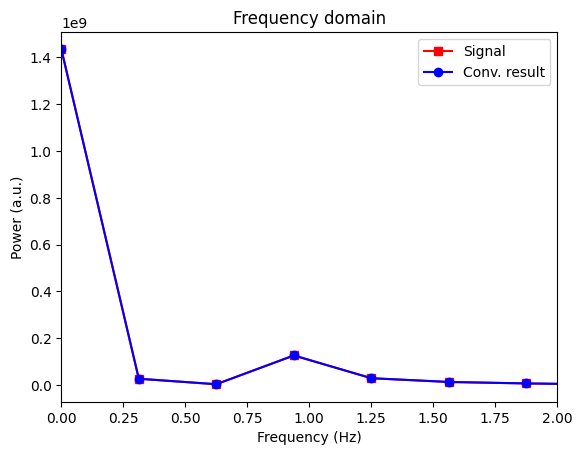

In [8]:
# Let's try convolution with a gaussian in freq domain

# Gaussian kernel
fwhm = 25
# normalized time vector in ms
k = 100
gtime = 1000*np.arange(-k,k)/srate

# create Gaussian window
gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )

# then normalize Gaussian to unit energy
gauswin = gauswin / np.sum(gauswin)

# compute N's
nConv = n + 2*k+1 - 1

# FFTs
dataX = scipy.fftpack.fft(signal,nConv)
gausX = scipy.fftpack.fft(gauswin,nConv)

# IFFT
convres = np.real( scipy.fftpack.ifft( dataX*gausX ) )

# cut edges
convres = convres[k:-k]

# frequencies vector
hz = np.linspace(0,srate,nConv)

# lines
plt.plot(time,signal,label='Orignal Signal')
plt.plot(time,filtsig,label='Mean smoothing')
plt.plot(time,convres,label='Spectral mult.')
plt.xlabel('Time (s)')
plt.ylabel('amp. (a.u.)')
plt.legend()
plt.show()

### frequency-domain plot

# plot Gaussian kernel
plt.plot(hz,np.abs(gausX)**2)
plt.ylabel('Gain'), plt.xlabel('Frequency (Hz)')
plt.title('Power spectrum of Gaussian')
plt.show()


# raw and filtered data spectra
plt.plot(hz,np.abs(dataX)**2,'rs-',label='Signal')
plt.plot(hz,np.abs(dataX*gausX)**2,'bo-',label='Conv. result')
plt.xlabel('Frequency (Hz)'), plt.ylabel('Power (a.u.)')
plt.legend()
plt.title('Frequency domain')
plt.xlim([0,2])
plt.show()
